In [56]:
# Dependencies
import pandas as pd
import csv
import requests
from pprint import pprint
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
from sodapy import Socrata
import os
import gmaps
from config import api_key


In [57]:
# Data collection - year 2021 - during-covid 

client = Socrata("data.melbourne.vic.gov.au", app_token="Mp9xM2ztPtLxPmpOj2ZhhkFYm", username="angelaliu0101@gmail.com", password="Lh*19630722")

results_2021 = client.get("b2ak-trbp", year= 2021, limit = 10000000)

results_2021_df = pd.DataFrame.from_records(results_2021)
location = results_2021_df.groupby("sensor_name")
results_2021_df.to_csv("foottrafficsdata2021.csv")
results_2021_df.head()

,id,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts
0,3482939,2021-01-01T00:00:00.000,2021,January,1,Friday,0,4,Town Hall (West),1461
1,3482940,2021-01-01T00:00:00.000,2021,January,1,Friday,0,17,Collins Place (South),79
2,3482941,2021-01-01T00:00:00.000,2021,January,1,Friday,0,18,Collins Place (North),33
3,3482942,2021-01-01T00:00:00.000,2021,January,1,Friday,0,53,Collins St (North),196
4,3482943,2021-01-01T00:00:00.000,2021,January,1,Friday,0,2,Bourke Street Mall (South),236


In [58]:
# Data 2021 cleaning - data types 

results_2021_df.dtypes

id               object
date_time        object
year             object
month            object
mdate            object
day              object
time             object
sensor_id        object
sensor_name      object
hourly_counts    object
dtype: object

In [83]:
# Data 2021 cleaning - data types - same from David
data_type_dict = {"id":int,"year":int,"mdate":int,"time":int,"hourly_counts":float}
results_2021_df = results_2021_df.astype(data_type_dict)
results_2021_df.dtypes
results_2021_df.to_csv('DATA.csv',index=False)

In [84]:
# 2021 morning Data 7am-10am groupby sum, dataframed and displyed by descending order with hourly_counts
mor_totaldf=pd.DataFrame(results_2021_df [results_2021_df ['time'].between(7,10)].groupby('sensor_name')['hourly_counts'].sum().sort_values(ascending=False))
mor_totaldf

,hourly_counts
sensor_name,
Flinders La-Swanston St (West),1209661.0
Flinders St-Elizabeth St (East),921906.0
Flinders Street Station Underpass,835253.0
Southbank,786199.0
Princes Bridge,762913.0
...,...
Flinders Ln - Degraves St (Crossing),18086.0
Royal Pde - Grattan St,16950.0
Macaulay Rd - Bellair St,10933.0


In [61]:
# 2021 morning Data 7am-10am groupby mean & std, dataframed and displyed by alphabetical order with sensor_name

mor_datadf=pd.DataFrame(results_2021_df [results_2021_df ['time'].between(7,10)].groupby('sensor_name')['hourly_counts'].describe())
mor_datadf

,count,mean,std,min,25%,50%,75%,max
sensor_name,,,,,,,,
231 Bourke St,1328.0,236.770331,119.449393,0.0,147.00,232.5,309.00,740.0
Alfred Place,1452.0,71.598485,59.865361,1.0,26.00,48.0,107.00,323.0
Birrarung Marr,1460.0,176.172603,160.816957,10.0,106.00,151.0,212.00,3801.0
Bourke St - Spencer St (North),1460.0,349.615753,292.462820,2.0,116.75,270.0,508.00,1628.0
Bourke St - Spencer St (South),248.0,102.120968,81.451319,4.0,37.75,81.5,146.25,427.0
...,...,...,...,...,...,...,...,...
Town Hall (West),1460.0,482.712329,332.507044,34.0,229.00,354.5,703.75,1649.0
Victoria Point,1440.0,50.743750,46.344770,0.0,12.00,40.0,73.00,269.0
Waterfront City,1460.0,39.754110,21.111258,0.0,25.75,37.0,51.00,143.0


In [62]:
# 2021 Midday Data 12pm-15pm groupby sum, dataframed and displyed by descending order with hourly_counts
noon_totaldf=pd.DataFrame(results_2021_df [results_2021_df ['time'].between(12,15)].groupby('sensor_name')['hourly_counts'].sum()
.sort_values(ascending=False))
noon_totaldf


,hourly_counts
sensor_name,
Flinders La-Swanston St (West),2632814.0
Town Hall (West),2264144.0
Bourke Street Mall (North),2065840.0
Flinders St-Elizabeth St (East),1755673.0
Princes Bridge,1710884.0
...,...
Flinders Ln - Degraves St (Crossing),31475.0
Royal Pde - Grattan St,13699.0
Macaulay Rd - Bellair St,13064.0


In [63]:
# 2021 Midday Data 12pm-15pm groupby mean & std,dataframed and displyed by alphabetical order with sensor_name

noon_datadf=pd.DataFrame(results_2021_df [results_2021_df ['time'].between(12,15)].groupby('sensor_name')['hourly_counts'].describe())

noon_datadf


,count,mean,std,min,25%,50%,75%,max
sensor_name,,,,,,,,
231 Bourke St,1328.0,549.612952,278.569425,105.0,352.75,508.0,685.25,3874.0
Alfred Place,1452.0,127.468320,112.177058,2.0,47.00,83.5,169.25,562.0
Birrarung Marr,1460.0,219.232877,256.215536,10.0,113.00,154.0,238.00,4067.0
Bourke St - Spencer St (North),1460.0,439.370548,251.192160,10.0,176.75,454.5,617.00,1478.0
Bourke St - Spencer St (South),248.0,136.834677,70.963246,22.0,80.00,127.0,192.25,321.0
...,...,...,...,...,...,...,...,...
Town Hall (West),1460.0,1550.783562,792.553706,56.0,648.50,1660.5,2109.00,3694.0
Victoria Point,1440.0,56.052778,45.043720,0.0,22.00,46.0,79.00,271.0
Waterfront City,1460.0,62.589041,41.174526,1.0,36.00,53.0,79.00,401.0


In [64]:
# 2021 Evening Data 18pm-21pm groupby sum, dataframed and displyed by descending order with hourly_counts
eve_totaldf=pd.DataFrame(results_2021_df [results_2021_df ['time'].between(18,21)].groupby('sensor_name')['hourly_counts'].sum().sort_values(ascending=False))

eve_totaldf


,hourly_counts
sensor_name,
Flinders La-Swanston St (West),1680305.0
Princes Bridge,1319401.0
Southbank,1297862.0
Elizabeth St-La Trobe St (East),1282018.0
Flinders St-Elizabeth St (East),1270365.0
...,...
Flinders Ln - Degraves St (Crossing),8957.0
Royal Pde - Grattan St,6781.0
Spring St - Flinders St (West),6360.0


In [65]:
# 2021 Evening Data 18pm-21pm groupby mean & std,dataframed and displyed by alphabetical order with sensor_name

eve_datadf=pd.DataFrame(results_2021_df [results_2021_df ['time'].between(18,21)].groupby('sensor_name')['hourly_counts'].describe())
eve_datadf


,count,mean,std,min,25%,50%,75%,max
sensor_name,,,,,,,,
231 Bourke St,1328.0,291.717620,208.221614,1.0,130.75,250.0,415.00,1243.0
Alfred Place,1452.0,37.185262,31.251025,0.0,13.00,28.0,54.00,197.0
Birrarung Marr,1460.0,206.950000,377.537183,0.0,50.00,103.0,208.00,5496.0
Bourke St - Spencer St (North),1460.0,272.336301,214.993447,0.0,111.00,236.0,357.00,1492.0
Bourke St - Spencer St (South),248.0,91.233871,61.382402,0.0,54.00,78.0,108.25,425.0
...,...,...,...,...,...,...,...,...
Town Hall (West),1460.0,869.274658,639.199899,21.0,328.00,753.0,1295.25,3757.0
Victoria Point,1440.0,46.406944,43.021235,0.0,15.00,38.0,62.00,342.0
Waterfront City,1460.0,78.554795,50.870736,0.0,41.00,72.0,109.00,511.0


In [86]:
# Plot the bar chart for weekly average pedestrian in particular day at Flinders La-Swanston St (West), most visited site in 2021
data_wk = pd.read_csv("foottrafficsdata2021.csv")
data_wk = data_wk[['id','date_time','year','month','mdate','day','time','sensor_id','sensor_name','hourly_counts']]

#selected area
point='Flinders La-Swanston St (West)'  #select sensor point
data_wk=data_wk[data_wk['sensor_name']==point]
weeks=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [109]:
# calculate weekly avaerage for particular day 

mors=[]
noons=[]
eves=[]
means=[]
for week in weeks:
    week_data=data_wk.groupby('day').get_group(week)  # group the data by week
    
    #divide by 52 to get average daily data in particular month:
    mors.append(week_data[week_data['time'].between(7, 10)].hourly_counts.sum()/52)
    noons.append(week_data[week_data['time'].between(12, 15)].hourly_counts.sum()/52)
    eves.append(week_data[week_data['time'].between(18, 21)].hourly_counts.sum()/52)
    means.append(week_data.hourly_counts.sum()/52)

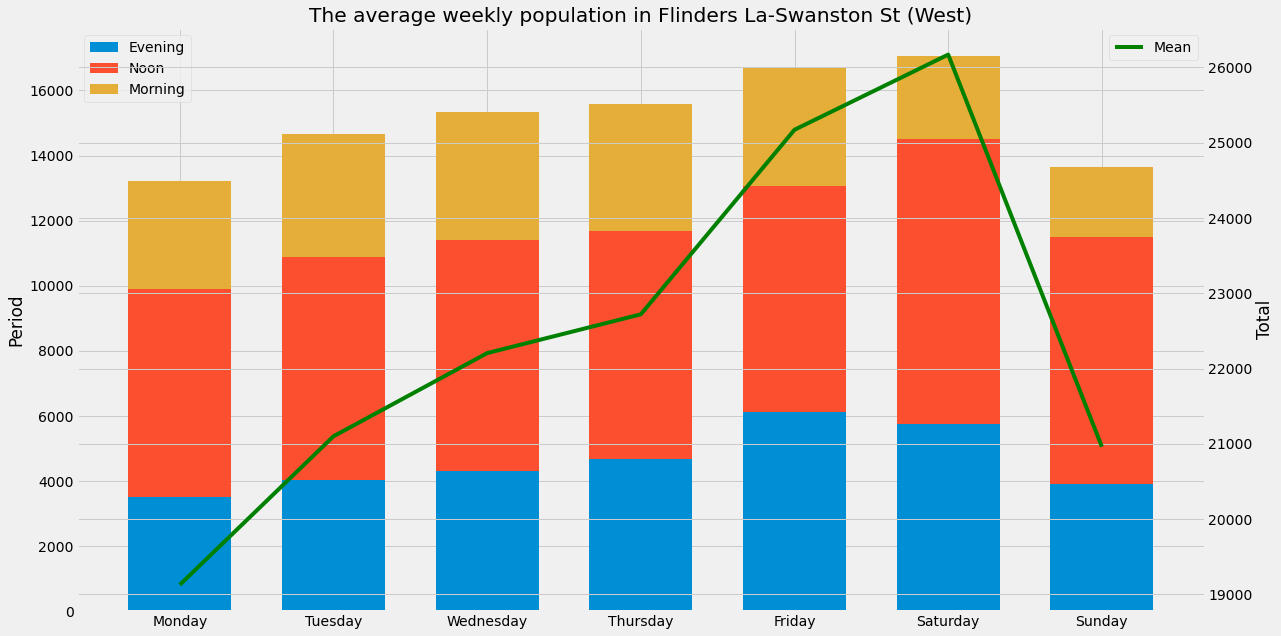

In [110]:
# plot the double-y axis plot with aggregated bar chart

plt.style.use('fivethirtyeight')#choose the style
#set the figure and x/y axis
plt.figure(figsize=(18,10))
x = weeks
y1 = np.array(eves)
y2 = np.array(noons)
y3 = np.array(mors)

#aggregate the barchart from diff period into one    
plt.bar(x, y1, bottom=0,label='Evening', width=0.67)
plt.bar(x, y2, bottom=y1, label='Noon', width=0.67)
plt.bar(x, y3, bottom=y1+y2, label='Morning', width=0.67)

#get back to the paint and draw another y-axis
ax=plt.gca()
ax2 = ax.twinx() #set the second ax cordinate for the mean
ax2.plot(x,[x for x in means],c='g',label='Mean')
plt.xlabel("Month",size=20)
ax.set_ylabel("Period")
ax2.set_ylabel("Total")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title("The average weekly population in "+point)

plt.show()

In [111]:

# daily average pedistrain number in months at Flinders La-Swanston St (West) # most visited site 
data_mt = pd.read_csv('foottrafficsdata2021.csv')
data_mt = data_mt[['id','date_time','year','month','mdate','day','time','sensor_id','sensor_name','hourly_counts']]

#selected area
point='Flinders La-Swanston St (West)' #select sensor point
data_mt=data_mt[data_mt['sensor_name']==point]
months=['January','February','March','April','May','June','July','August','September','October','November','December'] #select from month list

In [112]:
# calculate average daily pendestrian data in particular month 

mors=[]
noons=[]
eves=[]
means=[]
for month in months:
    month_data=data_mt.groupby('month').get_group(month) # group the data by month
    #divide by 30 to get average daily data in particular month:
    mors.append(month_data[month_data['time'].between(7, 10)].hourly_counts.sum()/30) 
    noons.append(month_data[month_data['time'].between(12, 15)].hourly_counts.sum()/30)
    eves.append(month_data[month_data['time'].between(18, 21)].hourly_counts.sum()/30)
    means.append(month_data.hourly_counts.sum()/30)

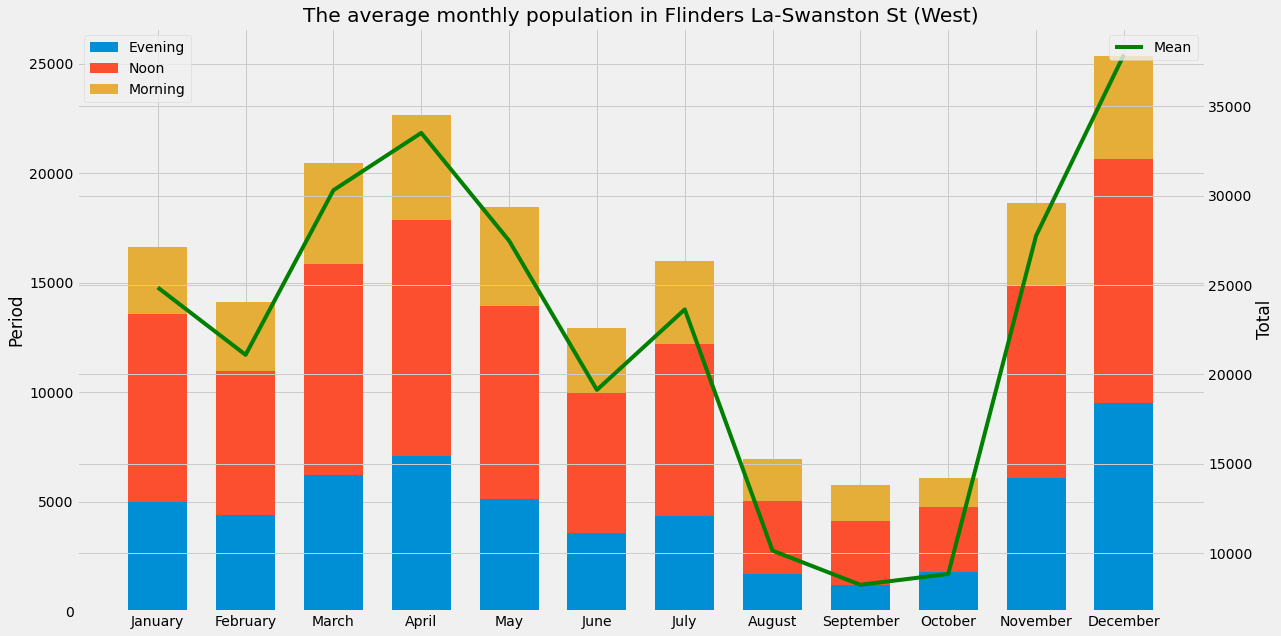

In [113]:
# plot the double-y axis plot with aggregated bar chart
plt.style.use('fivethirtyeight') #choose the style
#set the figure and x/y axis
plt.figure(figsize=(18,10)) 
x = months
y1 = np.array(eves)
y2 = np.array(noons)
y3 = np.array(mors)

#aggregate the barchart from diff period into one  
plt.bar(x, y1, bottom=0,label='Evening', width=0.67)
plt.bar(x, y2, bottom=y1, label='Noon', width=0.67)
plt.bar(x, y3, bottom=y1+y2, label='Morning', width=0.67)

#get back to the paint and draw another y-axis
ax=plt.gca()
ax2 = ax.twinx() #set the second ax cordinate for the mean
ax2.plot(x,[x for x in means],c='g',label='Mean') 
plt.xlabel("Month",size=20)
ax.set_ylabel("Period")
ax2.set_ylabel("Total")
ax.legend() 
ax2.legend(loc='upper right') 
plt.title("The average monthly population in "+point)

plt.show()

In [114]:


Location_list = noon_datadf.index.tolist()

location = []
latitude = []
longitude = []

for i in Location_list:
    try:
        base_url = "https://maps.googleapis.com/maps/api/geocode/json"
        target_location2 = i + ", Melbourne"
    
        params = {"address": target_location2, "key": api_key}
        response = requests.get(base_url, params=params)
        location_geo = response.json()
        lat = location_geo["results"][0]["geometry"]["location"]["lat"]
        lng = location_geo["results"][0]["geometry"]["location"]["lng"]
        print(f"{target_location2}: {lat}, {lng}")
        location.append(i)
        latitude.append(lat)
        longitude.append(lng)
    except:
        print("Target location not found")

231 Bourke St, Melbourne: -37.8133992, 144.9668301
Alfred Place, Melbourne: -37.8143404, 144.9701942
Birrarung Marr, Melbourne: -37.8187351, 144.9742624
Bourke St - Spencer St (North), Melbourne: -37.8170606, 144.9533436
Bourke St - Spencer St (South), Melbourne: -37.8171069, 144.9531785
Bourke St Bridge, Melbourne: -37.8159602, 144.9572025
Bourke St-Russell St (West), Melbourne: -37.8159602, 144.9572025
Bourke Street Mall (North), Melbourne: -37.8137685, 144.9644379
Bourke Street Mall (South), Melbourne: -37.8137685, 144.9644379
Chinatown-Lt Bourke St (South), Melbourne: -37.8132372, 144.9627782
Chinatown-Swanston St (North), Melbourne: -37.8058235, 144.9631138
Collins Place (North), Melbourne: -37.8144674, 144.9733256
Collins Place (South), Melbourne: -37.8144674, 144.9733256
Collins St (North), Melbourne: -37.8182937, 144.956676
Elizabeth St-La Trobe St (East), Melbourne: -37.8102887, 144.9614233
Elizabeth St-Lonsdale St (South), Melbourne: -37.8122041, 144.962311
Errol Street (East

In [115]:
temp=pd.DataFrame([location,latitude,longitude]).T
temp.columns=['location','Lat','Lon']
# temp=temp.sort_values(by='location')
temp

,location,Lat,Lon
0,231 Bourke St,-37.813399,144.96683
1,Alfred Place,-37.81434,144.970194
2,Birrarung Marr,-37.818735,144.974262
3,Bourke St - Spencer St (North),-37.817061,144.953344
4,Bourke St - Spencer St (South),-37.817107,144.953179
...,...,...,...
75,Tin Alley-Swanston St (West),-37.796776,144.964627
76,Town Hall (West),28.071683,-80.653388
77,Waterfront City,-37.81284,144.938204
78,Webb Bridge,-37.823352,144.947305


In [116]:
# create new df for location coordinate
location_dict = {
    "location": location,
    "Lat": latitude,
    "Lon":longitude,
    }
location_data_dict = pd.DataFrame(location_dict)

location_data_dict.head()

,location,Lat,Lon
0,231 Bourke St,-37.813399,144.966830
1,Alfred Place,-37.814340,144.970194
2,Birrarung Marr,-37.818735,144.974262
3,Bourke St - Spencer St (North),-37.817061,144.953344
4,Bourke St - Spencer St (South),-37.817107,144.953179


In [117]:
# noon_datadf.index.names=['']
noon_datadf['location']=noon_datadf.index
noon_datadf

,count,mean,std,min,25%,50%,75%,max,location
sensor_name,,,,,,,,,
231 Bourke St,1328.0,549.612952,278.569425,105.0,352.75,508.0,685.25,3874.0,231 Bourke St
Alfred Place,1452.0,127.468320,112.177058,2.0,47.00,83.5,169.25,562.0,Alfred Place
Birrarung Marr,1460.0,219.232877,256.215536,10.0,113.00,154.0,238.00,4067.0,Birrarung Marr
Bourke St - Spencer St (North),1460.0,439.370548,251.192160,10.0,176.75,454.5,617.00,1478.0,Bourke St - Spencer St (North)
Bourke St - Spencer St (South),248.0,136.834677,70.963246,22.0,80.00,127.0,192.25,321.0,Bourke St - Spencer St (South)
...,...,...,...,...,...,...,...,...,...
Town Hall (West),1460.0,1550.783562,792.553706,56.0,648.50,1660.5,2109.00,3694.0,Town Hall (West)
Victoria Point,1440.0,56.052778,45.043720,0.0,22.00,46.0,79.00,271.0,Victoria Point
Waterfront City,1460.0,62.589041,41.174526,1.0,36.00,53.0,79.00,401.0,Waterfront City


In [118]:
# merging foot traffic data and coord data

data_summary_2021 = location_data_dict.merge(noon_datadf,how="left", on="location" )
data_summary_2021.to_csv("datasummary21.csv")
data_summary_2021.head(10)

,location,Lat,Lon,count,mean,std,min,25%,50%,75%,max
0,231 Bourke St,-37.813399,144.966830,1328.0,549.612952,278.569425,105.0,352.75,508.0,685.25,3874.0
1,Alfred Place,-37.814340,144.970194,1452.0,127.468320,112.177058,2.0,47.00,83.5,169.25,562.0
2,Birrarung Marr,-37.818735,144.974262,1460.0,219.232877,256.215536,10.0,113.00,154.0,238.00,4067.0
3,Bourke St - Spencer St (North),-37.817061,144.953344,1460.0,439.370548,251.192160,10.0,176.75,454.5,617.00,1478.0
4,Bourke St - Spencer St (South),-37.817107,144.953179,248.0,136.834677,70.963246,22.0,80.00,127.0,192.25,321.0
5,Bourke St Bridge,-37.815960,144.957202,1272.0,378.198113,591.536520,30.0,144.00,219.5,419.25,7209.0
6,Bourke St-Russell St (West),-37.815960,144.957202,1436.0,490.004875,221.779316,0.0,282.00,476.0,651.00,1172.0
7,Bourke Street Mall (North),-37.813769,144.964438,1424.0,1450.730337,853.687151,128.0,438.75,1533.5,2099.00,4334.0
8,Bourke Street Mall (South),-37.813769,144.964438,1460.0,920.076027,593.535566,101.0,253.75,940.0,1328.25,4033.0
9,Chinatown-Lt Bourke St (South),-37.813237,144.962778,1460.0,241.371918,166.964692,15.0,83.00,215.0,341.25,910.0


In [119]:
noon_counts=results_2021_df[results_2021_df['time'].between(12,15)].groupby('sensor_name')['hourly_counts'].sum()# midday total number
noon_counts=pd.DataFrame(noon_counts)
# data_summary_2021["Midday foottrafic 2021"]=noon_counts
noon_counts.index.names=['']
noon_counts['location']=noon_counts.index
noon_counts

,hourly_counts,location
,,
231 Bourke St,729886.0,231 Bourke St
Alfred Place,185084.0,Alfred Place
Birrarung Marr,320080.0,Birrarung Marr
Bourke St - Spencer St (North),641481.0,Bourke St - Spencer St (North)
Bourke St - Spencer St (South),33935.0,Bourke St - Spencer St (South)
...,...,...
Town Hall (West),2264144.0,Town Hall (West)
Victoria Point,80716.0,Victoria Point
Waterfront City,91380.0,Waterfront City


In [120]:
lat_long=pd.merge(noon_counts,data_summary_2021[['location','Lat','Lon']],on='location',how='left')
lat_long=lat_long.dropna() #drop the NA value
lat_long

,hourly_counts,location,Lat,Lon
0,729886.0,231 Bourke St,-37.813399,144.966830
1,185084.0,Alfred Place,-37.814340,144.970194
2,320080.0,Birrarung Marr,-37.818735,144.974262
3,641481.0,Bourke St - Spencer St (North),-37.817061,144.953344
4,33935.0,Bourke St - Spencer St (South),-37.817107,144.953179
...,...,...,...,...
76,87155.0,Tin Alley-Swanston St (West),-37.796776,144.964627
77,2264144.0,Town Hall (West),28.071683,-80.653388
79,91380.0,Waterfront City,-37.812840,144.938204
80,355120.0,Webb Bridge,-37.823352,144.947305


In [82]:
# creating google heatmap 

# location & foot traffic input
foottrafic = lat_long["hourly_counts"]
position = lat_long[['Lat','Lon']]
# foottrafic = data_summary_2021["MEAN1"]

# Plot Heatmap
fig = gmaps.figure()    
heat_layer = gmaps.heatmap_layer(position, weights=foottrafic, max_intensity=2000000)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))